In [56]:
# for data analysis and wrangling
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for scaling and splitting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# for support vector regression
from sklearn.svm import SVR

# for random forest regression
from sklearn.ensemble import RandomForestRegressor

# for gradient boosting regression
from sklearn.ensemble import GradientBoostingRegressor

# for bagging regression
from sklearn.ensemble import BaggingRegressor

# for xgboost regression
import xgboost

# for k-nearest neighbors regression
from sklearn.neighbors import KNeighborsRegressor

# for ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, mean_absolute_percentage_error

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('consolidated_data.csv')
print(df.columns.values)
df.head()

['deviceIORate' 'cpu' 'memory' 'conns' 'arrivalRate' 'ioLoad' 'cpuLoad'
 'responseTime']


,deviceIORate,cpu,memory,conns,arrivalRate,ioLoad,cpuLoad,responseTime
0,50,1,700,25,1,0,350,14.6
1,50,1,700,25,1,0,400,15.1
2,50,1,700,25,1,0,450,15.1
3,50,1,700,25,1,0,500,14.6
4,50,1,700,25,1,20,350,23.8


In [58]:
# check the total number of rows along with data
df.tail()

,deviceIORate,cpu,memory,conns,arrivalRate,ioLoad,cpuLoad,responseTime
12513,50,4,800,100,20,180,500,878958.3
12514,50,4,800,100,20,200,350,827122.4
12515,50,4,800,100,20,200,400,1105585.7
12516,50,4,800,100,20,200,450,539449.2
12517,50,4,800,100,20,200,500,477299.5


In [59]:
# for analysis of data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
deviceIORate,12518.0,50.000000,0.000000,50.0,50.00,50.0,50.00,50.0
cpu,12518.0,2.687170,1.488336,1.0,1.00,4.0,4.00,4.0
memory,12518.0,745.869947,49.831125,700.0,700.00,700.0,800.00,800.0
conns,12518.0,58.655536,27.023705,25.0,25.00,50.0,75.00,100.0
arrivalRate,12518.0,10.177504,5.718124,1.0,5.00,10.0,15.00,20.0
ioLoad,12518.0,99.904138,63.248007,0.0,40.00,100.0,160.00,200.0
cpuLoad,12518.0,424.992012,55.903932,350.0,362.50,400.0,450.00,500.0
responseTime,12518.0,111764.966688,217321.774190,8.5,4240.85,29469.1,93288.25,2008239.3


## Assumptions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

- Correlating
We want to know how well does each feature correlate with Response Time.

- Completing
Since there are no missing values we do not need to complete any values.

- Correcting
Since deviceIORate is not changes we will be able to drop it from the dataset.

We will further analyze the data to validate some of our assumptions.

In [60]:
response_time_corr = df.corr()['responseTime'].sort_values(ascending=False)
print(response_time_corr)

responseTime    1.000000
conns           0.513892
ioLoad          0.422268
cpu             0.094844
arrivalRate     0.084401
cpuLoad        -0.002370
memory         -0.060463
deviceIORate         NaN
Name: responseTime, dtype: float64


In [61]:
# since deviceIORate is not correlated with responseTime, we can drop it
df.drop(['deviceIORate'], axis=1, inplace=True)

<Axes: title={'center': 'Pearson Correlation Matrix'}>

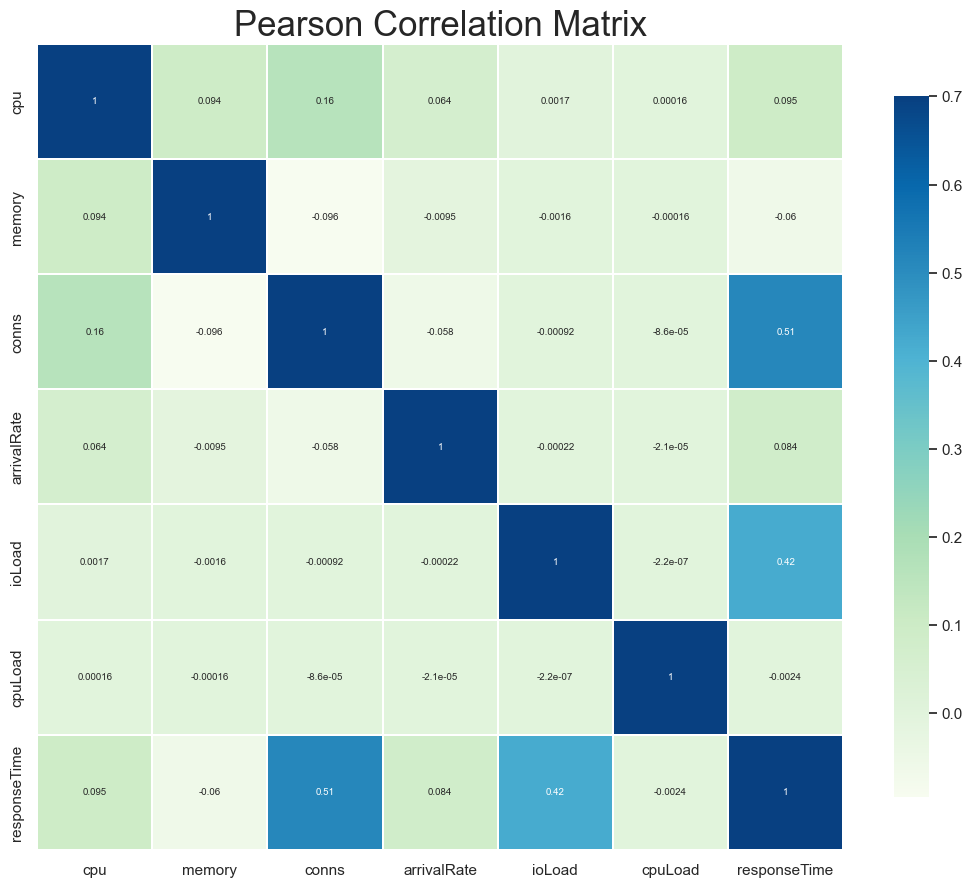

In [62]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [63]:
# Features
X = df.drop('responseTime',axis=1)

# Label
y = df['responseTime']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8762, 6)
(3756, 6)
(8762,)
(3756,)


In [64]:
scaler = StandardScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test.reshape(-1,1))
y_train = scaler.fit_transform(y_train.reshape(-1,1))

# check the max and min values of X_train
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.7103968322501557
Min:  -1.5958063612771007


In [74]:
# For fiting and evaluating the model
def fit_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    # predictions on the test set
    predictions = model.predict(X_test)

    print('MAE: ',mean_absolute_error(y_test,predictions))
    print('MSE: ',mean_squared_error(y_test,predictions))
    print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
    print('Variance Regression Score: ',explained_variance_score(y_test,predictions))
    print('MAPE: ',mean_absolute_percentage_error(y_test,predictions))

    print('\n\nDescriptive Statistics:\n',df['responseTime'].describe())

    return predictions

# For error analysis and perfect fit line
def error_analysis(predictions, y_values):
    f, axes = plt.subplots(1, 2,figsize=(15,5))
    # Our model predictions
    plt.scatter(y_values,predictions)
    # Perfect predictions
    plt.plot(y_values,y_values,'r')
    value_size = len(y_values)
    errors = y_values.reshape(value_size, 1) - predictions
    sns.distplot(errors, ax=axes[0])

    sns.despine(left=True, bottom=True)
    axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
    axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

# Results Comparision
def results_comparison(predictions, y_values):
    y_values = np.array(y_values).reshape(-1,1)
    plt.figure(figsize=(15,5))

    plt.plot(y_values[:300,:], color = 'red')
    plt.plot(predictions[:300], color = 'blue')
    plt.show()



# Linear Regression with 6 fold cross validation

In [66]:
# k-fold CV (using all the features)
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, 7))}]

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6]}],
             return_train_score=True, scoring='r2', verbose=1)

In [67]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006071,0.000725,0.000312,0.000053,1,{'n_features_to_select': 1},0.264971,0.270628,0.261047,0.250871,...,0.263048,0.006860,6,0.262683,0.261373,0.263643,0.266161,0.261970,0.263166,0.001678
1,0.006749,0.000946,0.000357,0.000046,2,{'n_features_to_select': 2},0.447514,0.446684,0.444071,0.436377,...,0.441621,0.005665,5,0.440413,0.440638,0.441088,0.443126,0.443853,0.441824,0.001397
2,0.005904,0.000153,0.000355,0.000017,3,{'n_features_to_select': 3},0.458921,0.458014,0.455193,0.451420,...,0.455050,0.003104,2,0.454441,0.454667,0.455285,0.456264,0.456166,0.455365,0.000748
3,0.004777,0.000052,0.000347,0.000002,4,{'n_features_to_select': 4},0.459225,0.458399,0.455251,0.450836,...,0.455146,0.003334,1,0.454563,0.454765,0.455472,0.456575,0.456281,0.455531,0.000798
4,0.003439,0.000027,0.000352,0.000005,5,{'n_features_to_select': 5},0.459042,0.458299,0.455170,0.450771,...,0.455036,0.003310,4,0.454622,0.454810,0.455475,0.456603,0.456317,0.455565,0.000789
5,0.001974,0.000007,0.000356,0.000006,6,{'n_features_to_select': 6},0.458955,0.458331,0.455212,0.450832,...,0.455047,0.003278,3,0.454652,0.454816,0.455477,0.456609,0.456342,0.455579,0.000787


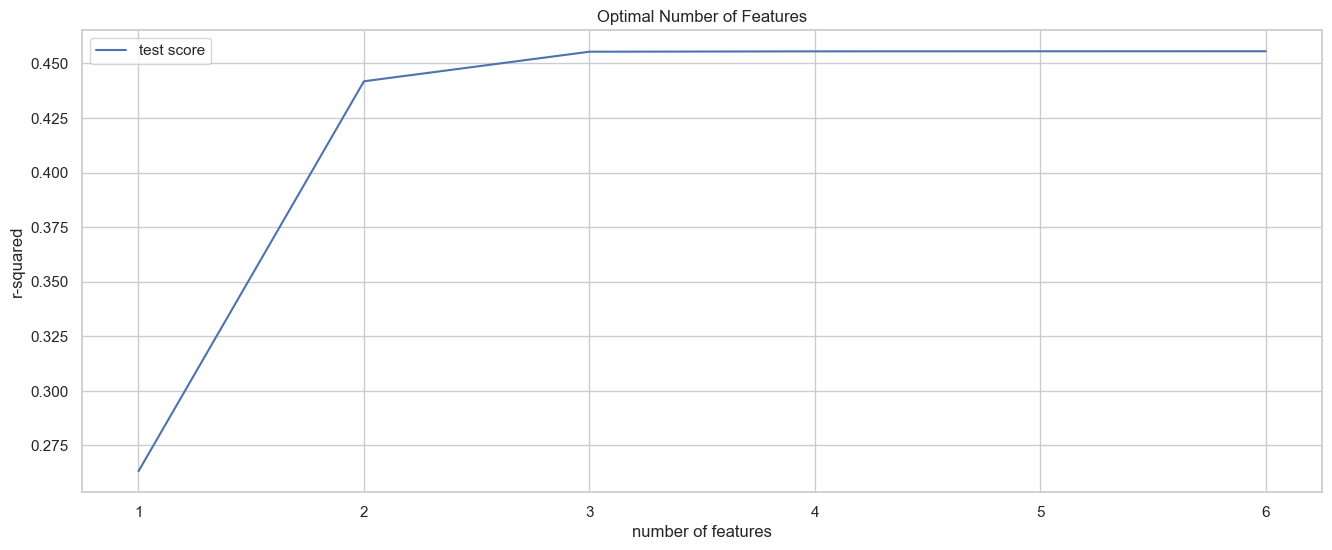

In [68]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [71]:
# final model
n_features_optimal = 4

lr = LinearRegression()
predictions = fit_and_evaluate(lr, X_train, y_train, X_test, y_test)

print()

rfe = RFE(lr, n_features_to_select=n_features_optimal)
predictions = fit_and_evaluate(rfe, X_train, y_train, X_test, y_test)

lr_mape = mean_absolute_error(y_test,predictions)

MAE:  0.48690397362949717
MSE:  0.5430692730719386
RMSE:  0.7369323395481695
Variance Regression Score:  0.45693072692806136
MAPE:  2.088156828378272


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64

MAE:  0.4868295519499478
MSE:  0.5430451780584117
RMSE:  0.7369159911810923
Variance Regression Score:  0.4569548219415883
MAPE:  2.090248103836022


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


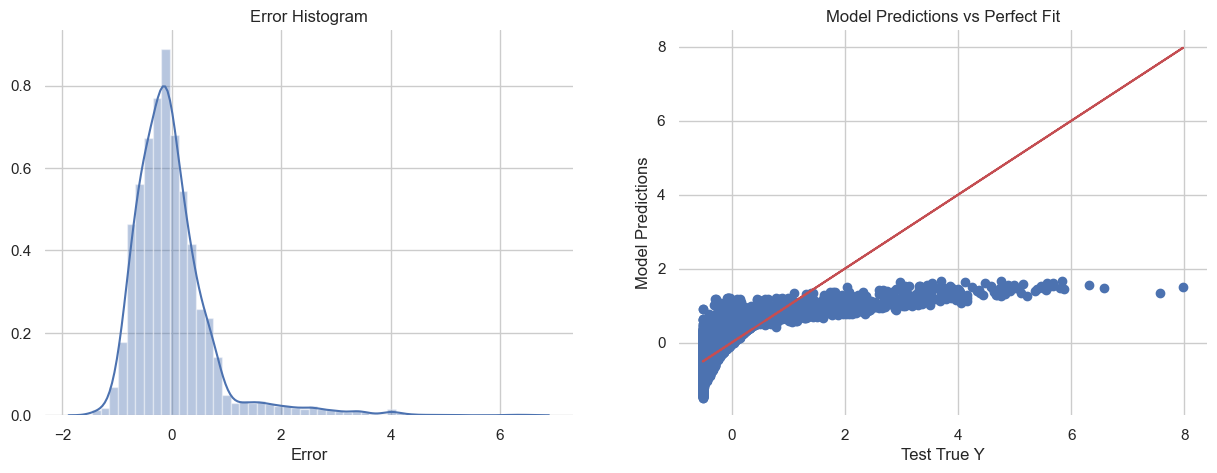

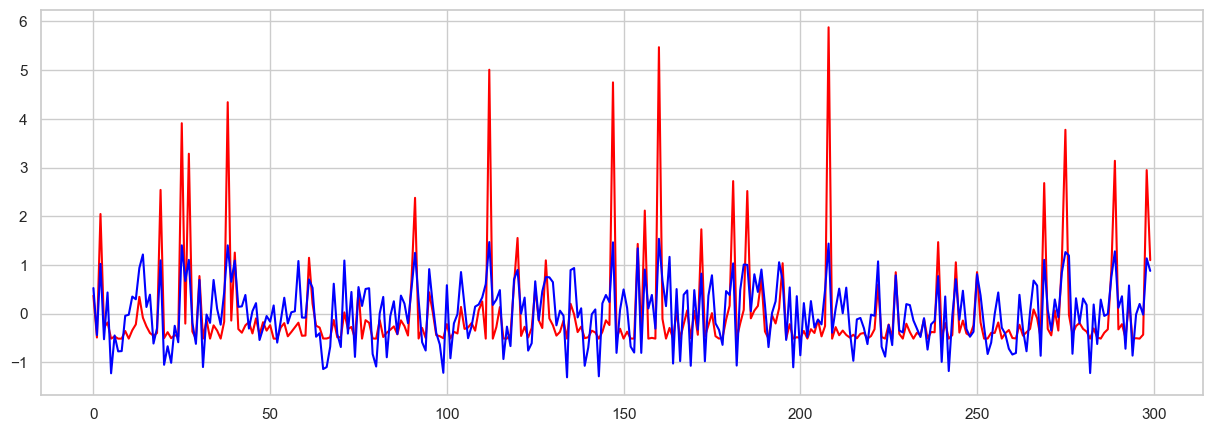

In [75]:
error_analysis(predictions, y_test)
results_comparison(predictions, y_test)

# Support Vector Regression

In [76]:
# Support Vector Regressor
svr = SVR(C=1000, gamma = 0.1)
predictions = fit_and_evaluate(svr, X_train, y_train, X_test, y_test)

svr_mape = mean_absolute_error(y_test, predictions)

MAE:  0.13010813607589755
MSE:  0.08570660312686487
RMSE:  0.2927569010747054
Variance Regression Score:  0.9143080371568507
MAPE:  0.42873600059632494


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


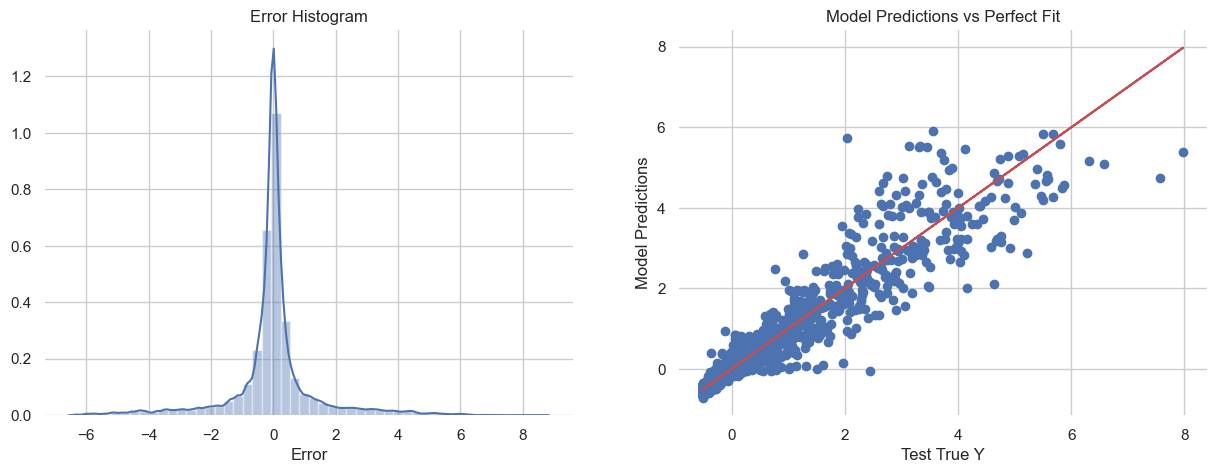

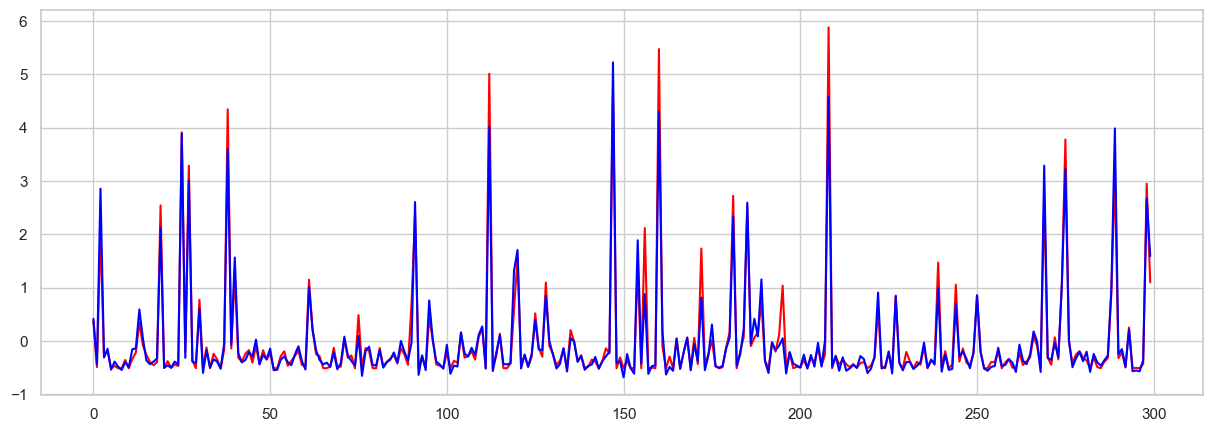

In [78]:
error_analysis(predictions, y_test)
results_comparison(predictions, y_test)

# Random Forest Regressor

In [79]:
# Random Forest Regressor
random_forest = RandomForestRegressor(random_state=60)
predictions = fit_and_evaluate(random_forest, X_train, y_train, X_test, y_test)

random_forest_mape = mean_absolute_error(y_test,predictions)

MAE:  0.09621708400824994
MSE:  0.08198063274422929
RMSE:  0.2863226025730929
Variance Regression Score:  0.9186942099592945
MAPE:  0.2491139884506688


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


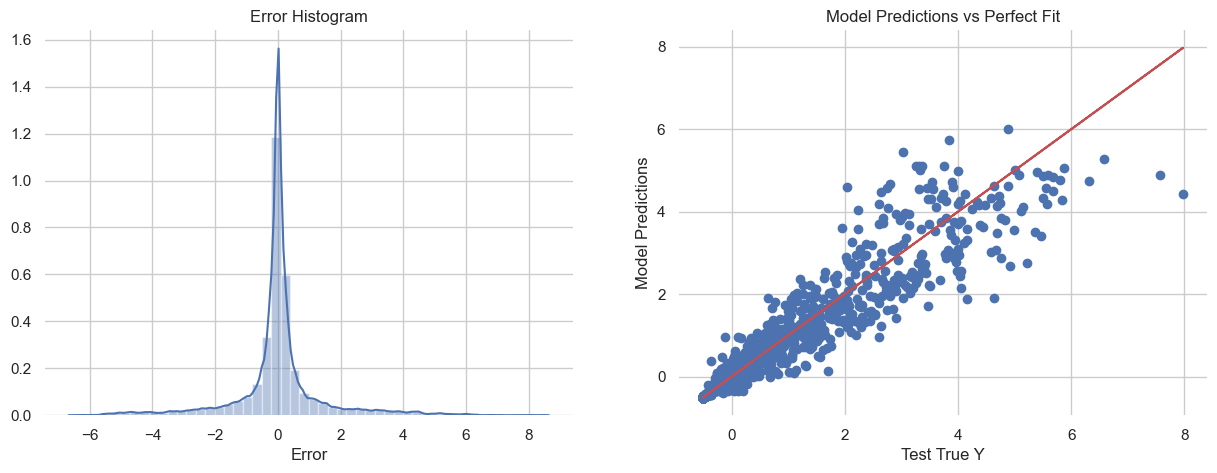

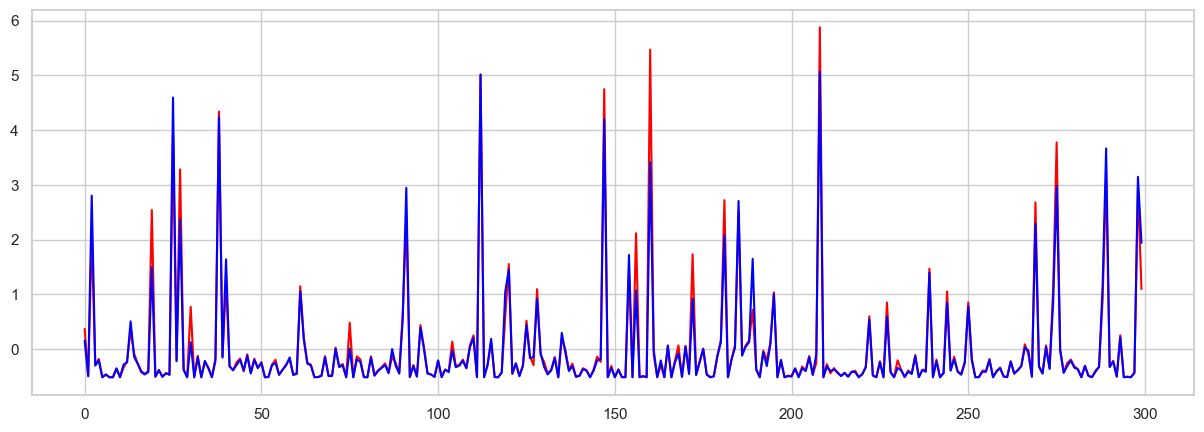

In [80]:
error_analysis(predictions, y_test)
results_comparison(predictions, y_test)

# Gradient Boosting Regressor

In [81]:
# Gradient Boosting Regressor
gradient_boosted = GradientBoostingRegressor(learning_rate = 0.1,random_state=60)
predictions = fit_and_evaluate(gradient_boosted, X_train, y_train, X_test, y_test)

gradient_boosted_mape = mean_absolute_error(y_test,predictions)

MAE:  0.15882652243275333
MSE:  0.09907878804519141
RMSE:  0.3147678319733314
Variance Regression Score:  0.9020468282080972
MAPE:  0.8359166541404928


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


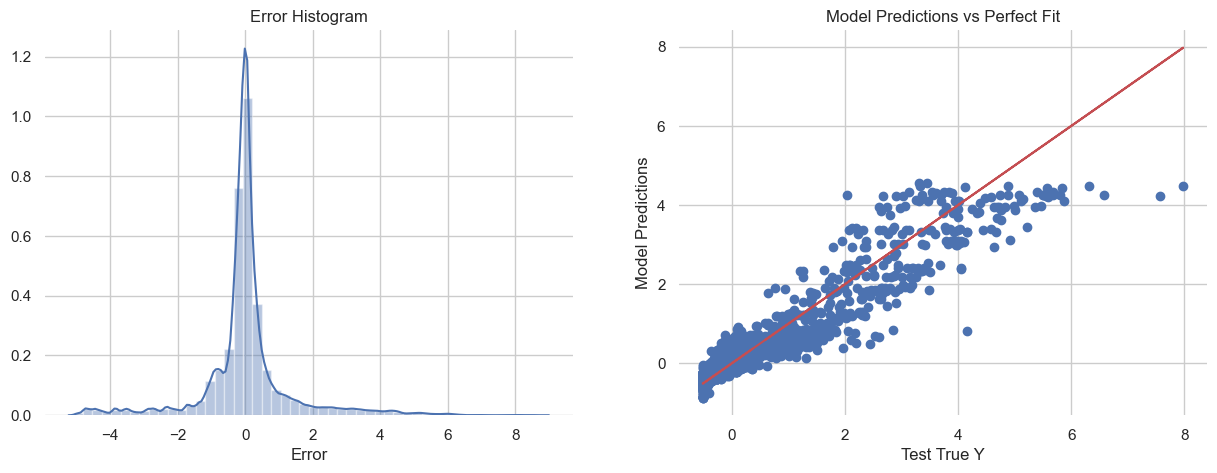

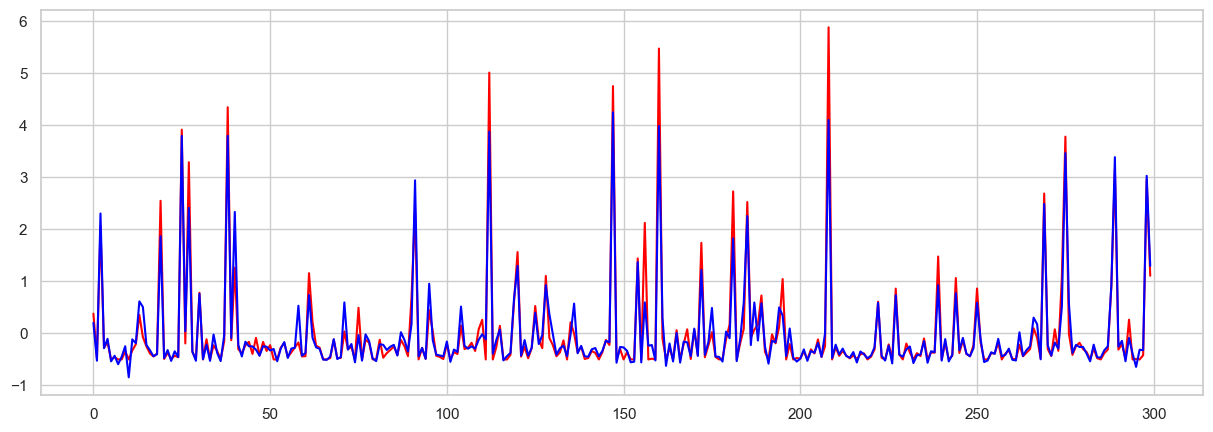

In [82]:
error_analysis(predictions, y_test)
results_comparison(predictions, y_test)

# Bagging Regressor

In [83]:
# Bagging Regressor
bagging = BaggingRegressor()
predictions = fit_and_evaluate(bagging, X_train, y_train, X_test, y_test)

bagging_mape = mean_absolute_error(y_test,predictions)

MAE:  0.10027333737944794
MSE:  0.09024620819740989
RMSE:  0.30041006673780074
Variance Regression Score:  0.9104889498397213
MAPE:  0.2677545861383569


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


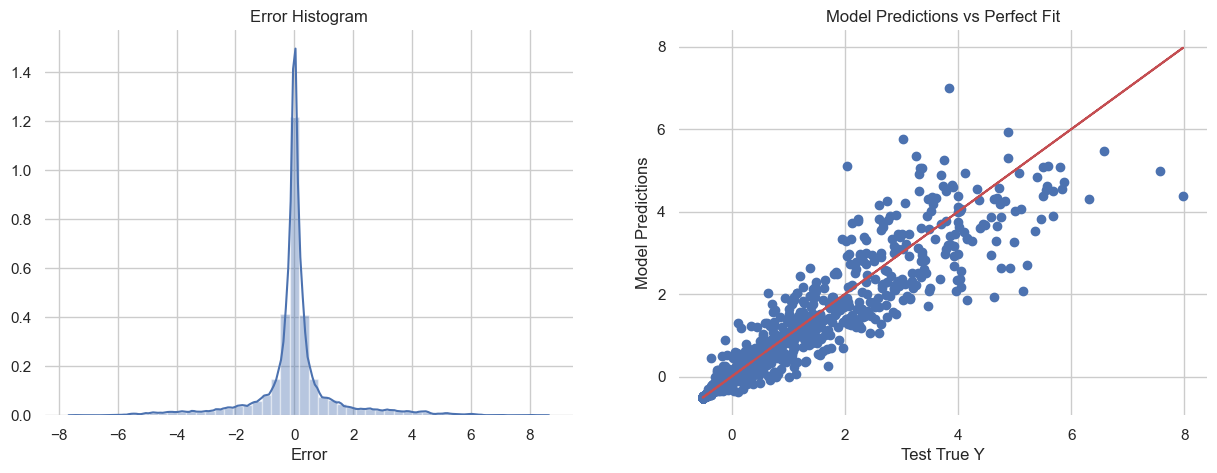

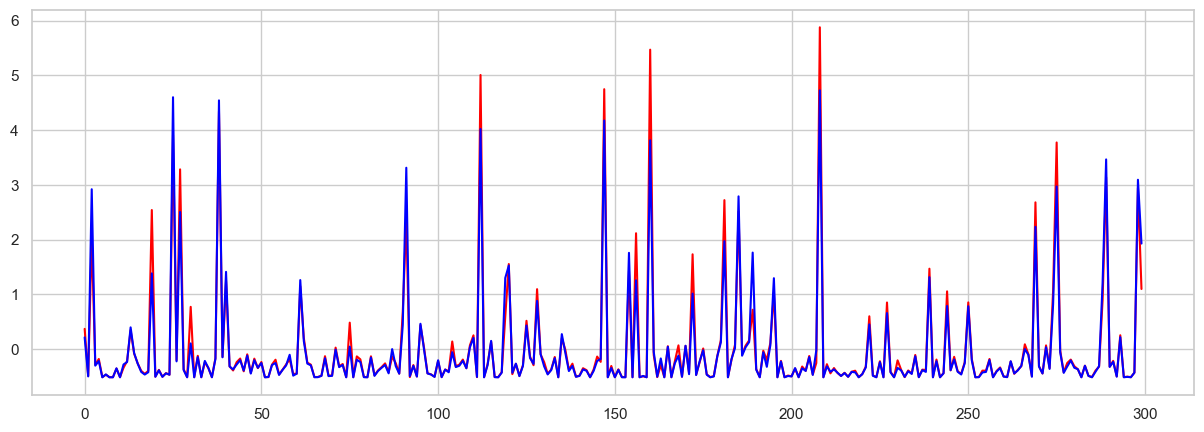

In [84]:
error_analysis(predictions, y_test)
results_comparison(predictions, y_test)

# XGB Regressor

In [85]:
#XGB Regressor
xboost = xgboost.XGBRegressor(random_state = 60)
predictions = fit_and_evaluate(xboost, X_train, y_train, X_test, y_test)

xboost_mape = mean_absolute_error(y_test,predictions)

MAE:  0.10545990937121838
MSE:  0.09153005729113654
RMSE:  0.30253934833528107
Variance Regression Score:  0.9089963460562399
MAPE:  0.3159289247631124


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


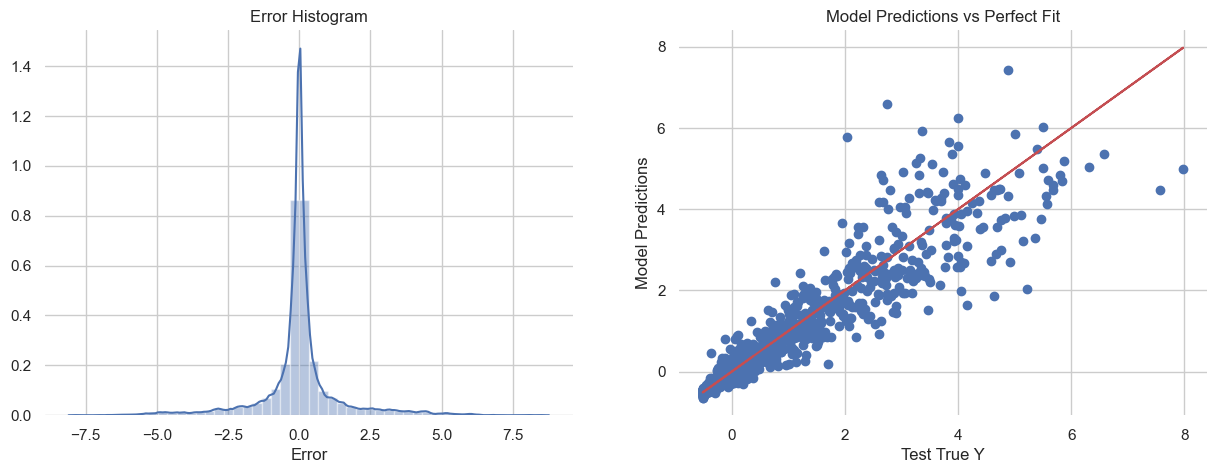

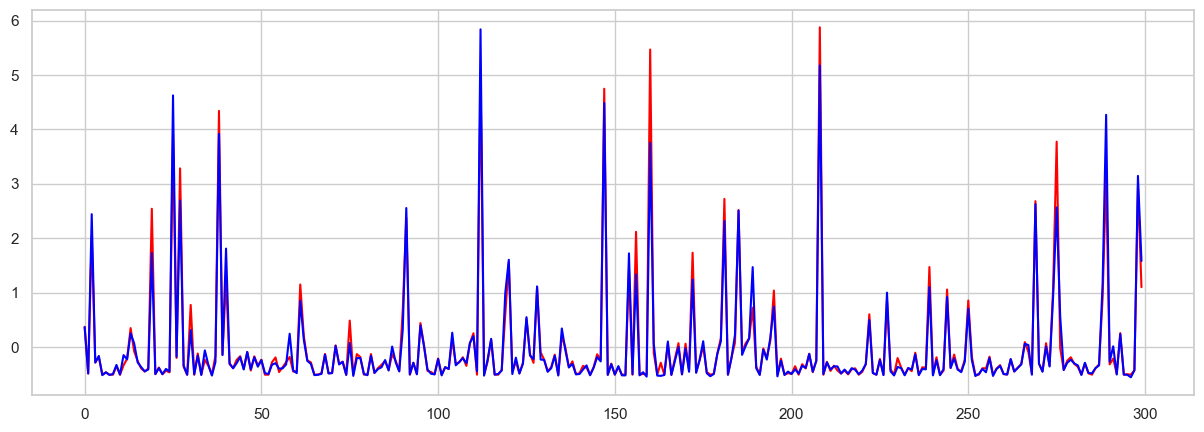

In [86]:
error_analysis(predictions, y_test)
results_comparison(predictions, y_test)

# KN Neighbors Regressor

In [87]:
knn = KNeighborsRegressor(n_neighbors=10)
predictions = fit_and_evaluate(knn, X_train, y_train, X_test, y_test)

knn_mape = mean_absolute_error(y_test,predictions)

MAE:  0.1145235981841801
MSE:  0.08962050268577441
RMSE:  0.2993668363158725
Variance Regression Score:  0.9110593728502564
MAPE:  0.34106238567872166


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


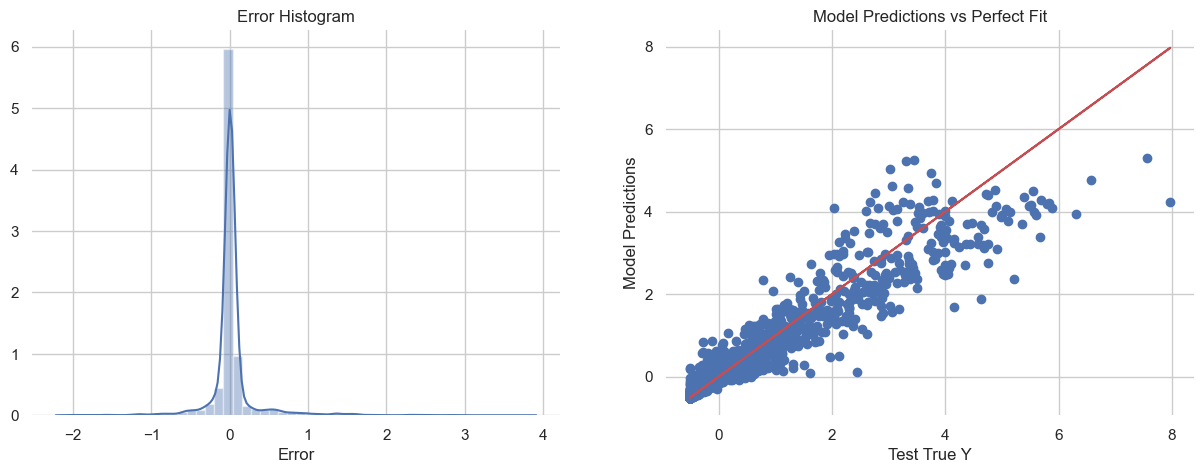

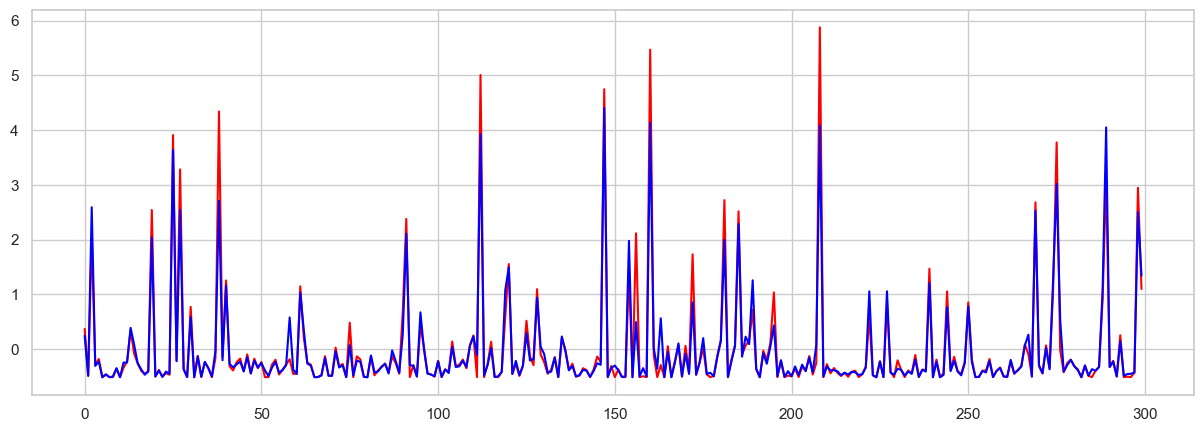

In [88]:
error_analysis(predictions, y_test)
results_comparison(predictions, y_test)

# Artificial Neural Network

In [89]:
ann = Sequential()
learning_rate = 0.0001

# input layer
ann.add(Dense(6,activation='gelu'))

# hidden layers
ann.add(Dense(16,activation='gelu'))
ann.add(Dense(64,activation='gelu'))
ann.add(Dense(16,activation='gelu'))

# output layer
ann.add(Dense(1))

ann.compile(optimizer=Adam(learning_rate=learning_rate),loss='mse')

ann.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=2000)

Epoch 1/2000
69/69 [==============================] - 1s 2ms/step - loss: 0.9994 - val_loss: 0.9845
Epoch 2/2000
69/69 [==============================] - 0s 967us/step - loss: 0.9724 - val_loss: 0.9595
Epoch 3/2000
69/69 [==============================] - 0s 954us/step - loss: 0.9449 - val_loss: 0.9313
Epoch 4/2000
69/69 [==============================] - 0s 954us/step - loss: 0.9124 - val_loss: 0.8971
Epoch 5/2000
69/69 [==============================] - 0s 950us/step - loss: 0.8738 - val_loss: 0.8580
Epoch 6/2000
69/69 [==============================] - 0s 924us/step - loss: 0.8320 - val_loss: 0.8189
Epoch 7/2000
69/69 [==============================] - 0s 935us/step - loss: 0.7924 - val_loss: 0.7841
Epoch 8/2000
69/69 [==============================] - 0s 919us/step - loss: 0.7568 - val_loss: 0.7524
Epoch 9/2000
69/69 [==============================] - 0s 925us/step - loss: 0.7239 - val_loss: 0.7225
Epoch 10/2000
69/69 [==============================] - 0s 929us/step - loss: 0.6928 

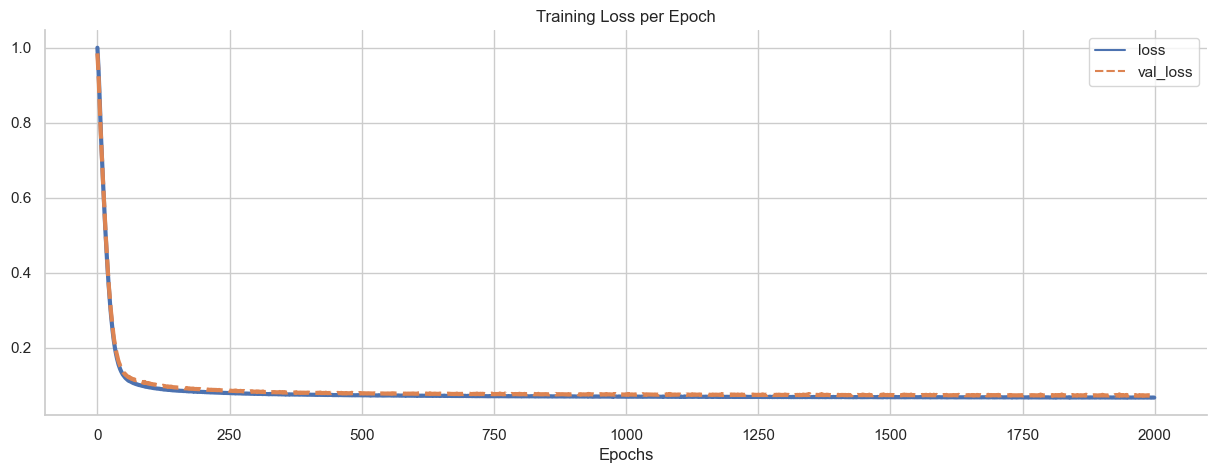

In [90]:
losses = pd.DataFrame(ann.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [91]:
predictions = ann.predict(X_test)
ann_mape = mean_absolute_error(y_test,predictions)
print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))
print('MAPE: ',mean_absolute_percentage_error(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['responseTime'].describe())

118/118 [==============================] - 0s 387us/step
MAE:  0.10533692542638333
MSE:  0.07319024820108778
RMSE:  0.2705369627261454
Variance Regression Score:  0.9268128523511134
MAPE:  0.38702486357316


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


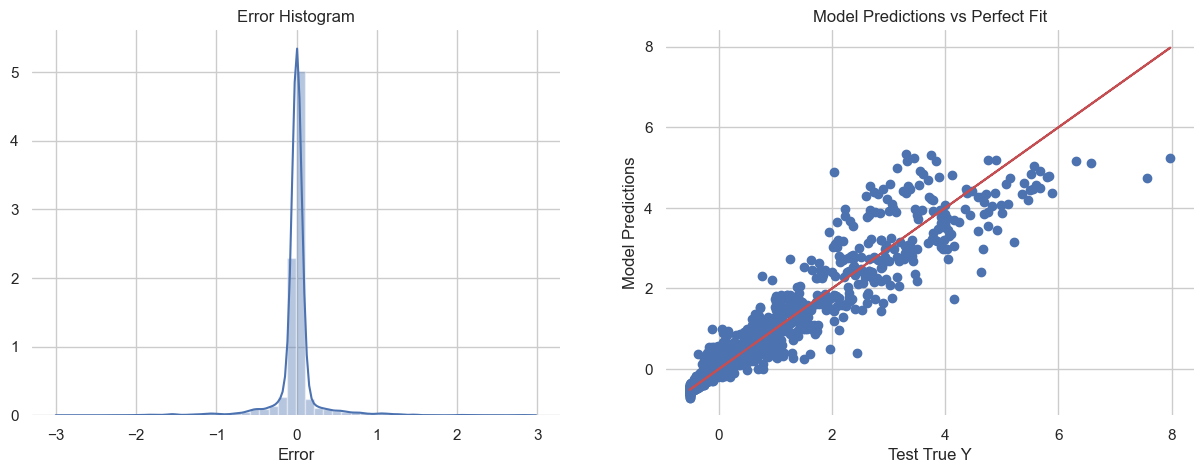

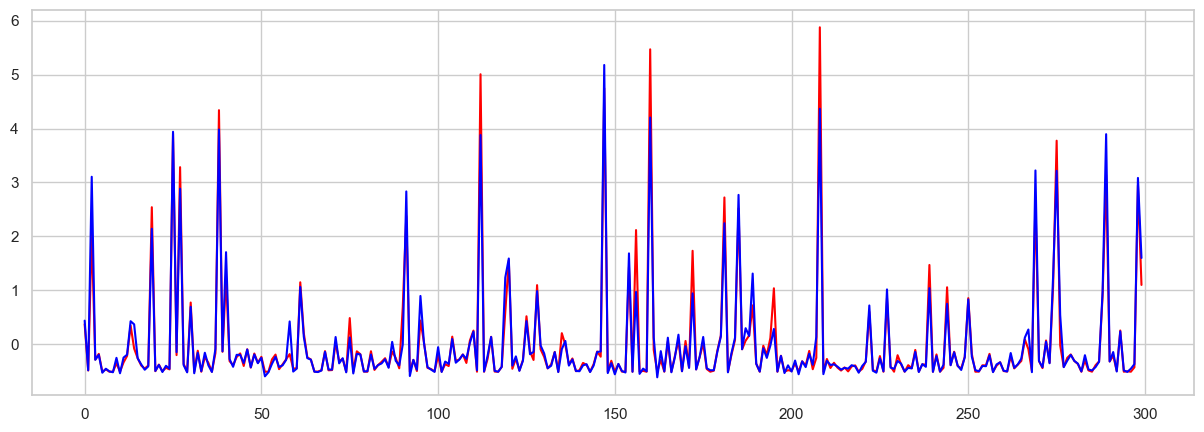

In [92]:
error_analysis(predictions, y_test)
results_comparison(predictions, y_test)

# Comparision of all models

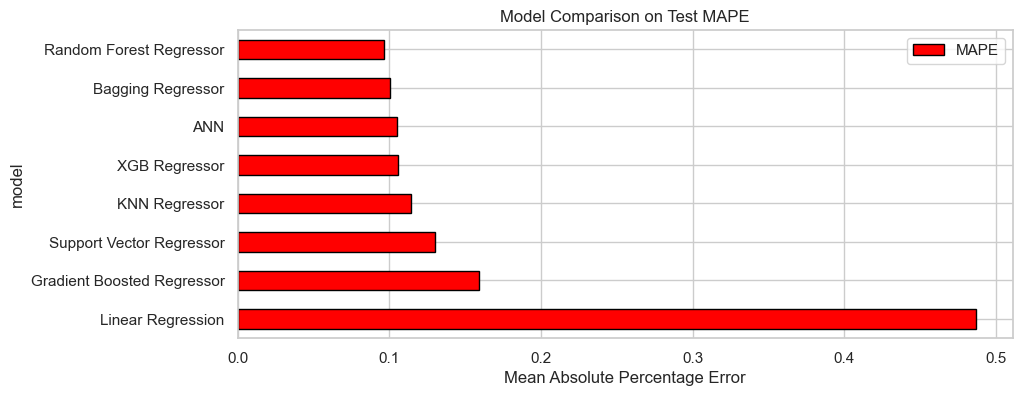

In [93]:
# Comparision of all the models
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Regressor',
                                           'Random Forest Regressor', 'Gradient Boosted Regressor',
                                           'KNN Regressor', 'Bagging Regressor','XGB Regressor','ANN'], 
                                'MAPE': [lr_mape, svr_mape, random_forest_mape, gradient_boosted_mape,
                                         knn_mape, bagging_mape, xboost_mape, ann_mape]})

model_comparison.sort_values('MAPE', ascending = False).plot(x = 'model',
                                                             y = 'MAPE', kind = 'barh', color = 'red',
                                                             edgecolor = 'black', figsize = (10,4))
plt.xlabel('Mean Absolute Percentage Error')
plt.title('Model Comparison on Test MAPE')
plt.show()

## Model Selection and Data Prediction
We will select Random Forest Regressor as our model for prediction as it has the highest accuracy score.

Let's predict the Response Time for new data.

In [34]:
# new_data = df.drop('responseTime',axis=1).iloc[80]
# print(f'Features of new data:\n{new_data}')

# # reshape the numpy array and scale the features
# new_system = scaler.transform(new_data.values.reshape(-1, 6))

# # run the model and get the price prediction
# print('\nPredicted Response Time:',model.predict(new_system))

# # original price
# print('\nOriginal Response Time:',df.iloc[80]['responseTime'])

# Results and Plots